In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/book 40.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [7]:
x=df["Open"]
#convert into 2d
import numpy as np
x=np.array(x).reshape(len(x),1)

#minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
#time sries format
x_stock=[]  #independent--->input feature
y_stock=[]   #dependent---->targated value

In [9]:
for i in range(30,len(x)):
  x_stock.append(x[i-30:i]) #append sequence of the previous 30data points
  y_stock.append(x[i])

In [10]:
import numpy as np
x_stock=np.array(x_stock)
y_stock=np.array(y_stock)
#print(x_stock,y_stock)

In [11]:
print(x_stock.shape)

(1228, 30, 1)


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential
lstm=Sequential()
#first lstm layer ------>accepts data into the 3d form
lstm.add(LSTM(units=50,input_shape=(x_stock.shape[1],x_stock.shape[2]),return_sequences=True)) #provide shape of  per one sample

#2 lstm layer
lstm.add(LSTM(units=20))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
#output layer
lstm.add(Dense(units=1,activation="relu"))

In [14]:
lstm.compile(optimizer="adam",loss="mean_squared_error")   #adam new optimizer --->compiling
#optimizer present at gradiend descent

In [16]:
history=lstm.fit(x_stock,y_stock,batch_size=10,epochs=50)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0172
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0013
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0013
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0012
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0010
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 8.7640e-04
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.0432e-04
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 8.7463e-04
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 7.4374e-04
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 8.4443e-04
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 6.6097e-04
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 9.0743e-04
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.8666e-04
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 5.0993e-04
Epoch 1

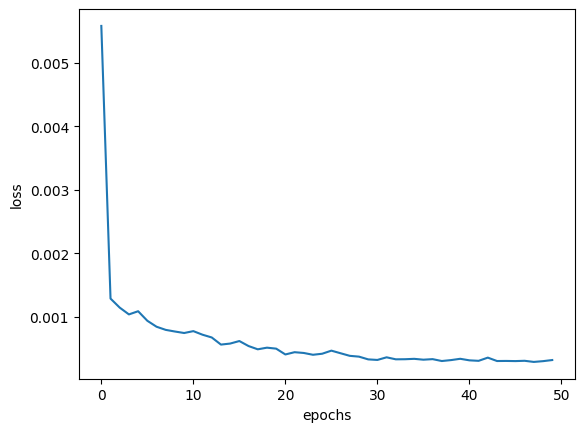

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [19]:
y_pred=lstm.predict(x_stock)
y_pred

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[0.04162748],
       [0.0424669 ],
       [0.03882153],
       ...,
       [0.9465848 ],
       [0.9526477 ],
       [0.9325321 ]], dtype=float32)

In [20]:
# inverse transform is concept of making original data as it was before transformation
y_pred=scaler.inverse_transform(y_pred)
y_pred


array([[301.49725],
       [301.94852],
       [299.9889 ],
       ...,
       [787.9661 ],
       [791.2253 ],
       [780.4119 ]], dtype=float32)

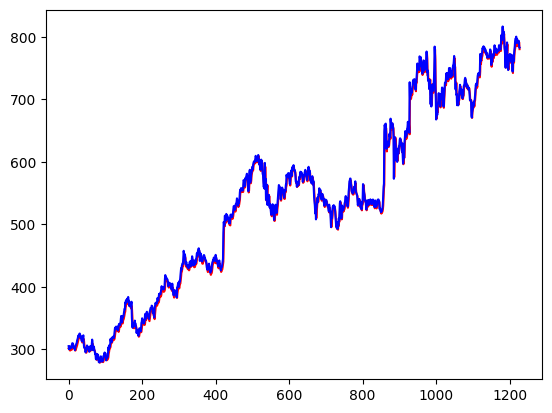

In [21]:
y_stock=scaler.inverse_transform(y_stock)
plt.plot(y_pred,color="red")
plt.plot(y_stock,color="blue")
plt.show()

In [22]:
#prediction 31 dec,2016
last_30_days=x[-30:]
print(last_30_days.shape)

(30, 1)


In [23]:
last_30_days=np.reshape(last_30_days,(1,30,1))
dec_31=lstm.predict(last_30_days)
dec_31=scaler.inverse_transform(dec_31)
dec_31

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[780.32007]], dtype=float32)

In [24]:
#next 10 days prediction
predicted=np.array([])
for i in range(10):
  d=x[-30:]
  next_day=lstm.predict(np.reshape(d,(1,30,1)))
  predicted=np.append(predicted,next_day)
  x=np.append(x,next_day)
#x
print(predicted.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
(10,)


In [25]:
predicted=scaler.inverse_transform(np.reshape(predicted,(10,1)))
predicted

array([[780.32011095],
       [778.83430232],
       [777.40757742],
       [775.97274614],
       [774.51952328],
       [773.05803383],
       [771.59946011],
       [770.15021034],
       [768.71108556],
       [767.28323923]])

In [26]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Dataset/stock_test.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


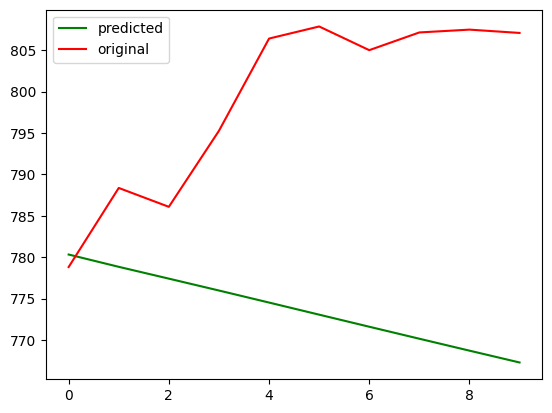

In [27]:
import pandas as pd
test=pd.read_csv("/content/drive/MyDrive/Dataset/stock_test.csv")["Open"]
test=test.iloc[:10]
plt.plot(predicted,color="green")
plt.plot(test,color="red")
plt.legend(["predicted","original"])
plt.show()
